In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
model_rank = pd.read_csv('datasets\model_score.csv')

In [3]:
model_rank['Overall'] = 0.55 * model_rank['pca_1'] + 0.12 * model_rank['pca_2'] + 0.15 * model_rank['pca_3'] + 0.18 * model_rank['pca_4']

# school name preprocessing
mask_2018_2020 = (model_rank['Year'] >= 2018) & (model_rank['Year'] <= 2020)
model_rank.loc[mask_2018_2020, 'Institution Name'] = model_rank.loc[mask_2018_2020, 'Institution Name'].apply(lambda x: x.upper())

# Rank using groupby year
model_rank['Rank'] = model_rank.groupby('Year')['Overall'].rank(
    method='min',
    ascending=False 
).astype(int) 

# model_rank = model_rank.sort_values(['Year', 'Rank'])
model_rank.head(20)

,Institution Name,Country,Year,FA_1,FA_2,FA_3,FA_4,pca_1,pca_2,pca_3,pca_4,Overall,Rank
0,MASSACHUSETTS INSTITUTE OF TECHNOLOGY (MIT),United States,2018,0.759353,0.660649,0.758502,0.653160,0.995439,0.979328,1.000000,0.926707,0.981818,1
1,STANFORD UNIVERSITY,United States,2018,0.761055,0.547066,0.762039,0.720414,0.999386,0.853371,1.000000,0.979129,0.978310,2
2,HARVARD UNIVERSITY,United States,2018,0.761588,0.547089,0.748739,0.719905,0.998265,0.851726,0.982811,0.978599,0.974823,4
3,CALIFORNIA INSTITUTE OF TECHNOLOGY (CALTECH),United States,2018,0.630186,0.642320,0.804791,0.648269,0.830329,0.911039,1.000000,0.802198,0.860401,25
4,UNIVERSITY OF CAMBRIDGE,United Kingdom,2018,0.784793,0.657972,0.758207,0.603382,0.998849,0.975315,1.000000,0.889458,0.976507,3
5,UNIVERSITY OF OXFORD,United Kingdom,2018,0.782334,0.667966,0.758749,0.592527,0.993382,0.985322,1.000000,0.875996,0.972278,5
6,UCL (UNIVERSITY COLLEGE LONDON),United Kingdom,2018,0.747693,0.672760,0.763926,0.608627,0.945706,0.983662,0.990900,0.883047,0.945761,7
7,IMPERIAL COLLEGE LONDON,United Kingdom,2018,0.770023,0.691225,0.764472,0.563634,0.961247,1.000000,1.000000,0.847145,0.951172,6
8,UNIVERSITY OF CHICAGO,United States,2018,0.767639,0.503226,0.749493,0.630773,0.963979,0.757900,0.964611,0.850336,0.918889,11
9,ETH ZURICH (SWISS FEDERAL INSTITUTE OF TECHNOL...,Switzerland,2018,0.759036,0.678288,0.492812,0.682376,0.966649,0.993639,0.678463,0.960492,0.925551,10


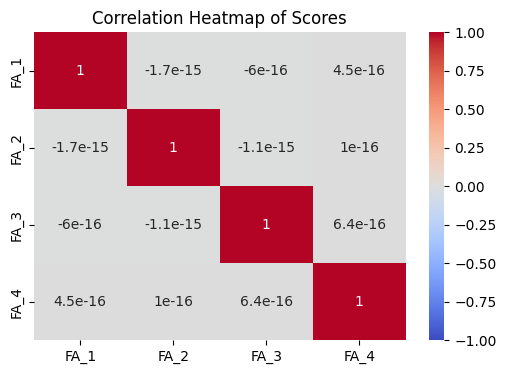

In [4]:
# Factor Heatmap
model_fa = model_rank[[col for col in model_rank.columns if 'FA' in col]]
corr_matrix = model_fa.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Scores')
plt.show()

### Analysis for 2026 under PCA/FA Model

In [5]:
model_rank_2026 = model_rank.loc[model_rank['Year']==2026].copy()
model_rank_2026.reset_index(drop=True, inplace=True)

In [6]:
model_rank_2026[:20]

,Institution Name,Country,Year,FA_1,FA_2,FA_3,FA_4,pca_1,pca_2,pca_3,pca_4,Overall,Rank
0,Massachusetts Institute of Technology (MIT),United States of America,2026,0.757048,0.630109,0.759647,0.692853,1.000000,0.955475,1.000000,0.968612,0.989007,1
1,Imperial College London,United Kingdom,2026,0.748282,0.665710,0.756961,0.689969,0.984107,1.000000,0.992922,0.981537,0.986874,2
2,Stanford University,United States of America,2026,0.763188,0.530506,0.764100,0.723990,1.000000,0.831663,1.000000,0.981973,0.976555,5
3,University of Oxford,United Kingdom,2026,0.763841,0.659401,0.758746,0.639535,1.000000,0.986813,1.000000,0.904670,0.981258,3
4,Harvard University,United States of America,2026,0.765857,0.512678,0.754564,0.696777,1.000000,0.800979,0.982811,0.929809,0.960905,6
5,University of Cambridge,United Kingdom,2026,0.768771,0.642627,0.758359,0.634269,1.000000,0.963426,1.000000,0.896262,0.976938,4
6,ETH Zurich (Swiss Federal Institute of Technol...,Switzerland,2026,0.753759,0.672227,0.524097,0.706994,0.969287,0.996290,0.713852,0.991849,0.938273,12
7,National University of Singapore (NUS),Singapore,2026,0.781153,0.668113,0.514447,0.658516,0.993830,0.983568,0.711830,0.936306,0.939944,11
8,UCL (University College London),United Kingdom,2026,0.751208,0.673989,0.723768,0.653830,0.959825,0.998078,0.947422,0.947491,0.960334,7
9,California Institute of Technology (Caltech),United States of America,2026,0.623718,0.683125,0.801780,0.629215,0.811327,0.950704,1.000000,0.801371,0.854561,34


In [7]:
# Count number of top 100 universities for each country
years = [2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026]

# Uniform the same country name
model_rank.loc[model_rank['Country'].isin(['Hong Kong SAR','Hong Kong','Hong Kong,China']), 'Country'] = 'Hong Kong SAR, China'
model_rank.loc[model_rank['Country']== 'China', 'Country'] = 'China (Mainland)'
model_rank.loc[model_rank['Country']== 'United States', 'Country'] = 'United States of America'
model_rank.loc[model_rank['Country']== 'South Korea', 'Country'] = 'Republic of Korea'

# create dictionaries to store annual data
yearly_top100 = {}
country_top100 = {}
for year in years:
    yearly_top100[year] = model_rank.loc[(model_rank['Rank'] <= 100) & (model_rank['Year'] == year)]
    country_top100[year]= (yearly_top100[year]
    .groupby(['Country'])
    .count()
    .rename(columns={'Institution Name': year})
    .sort_values(by='Year', ascending=False)
    .iloc[:,:1])

result = pd.concat([country_top100[2026],
                    country_top100[2025],
                    country_top100[2024],
                    country_top100[2023],
                    country_top100[2022],
                    country_top100[2021],
                    country_top100[2020],
                    country_top100[2019],
                    country_top100[2018]],axis=1)
result.head(10)

,2026,2025,2024,2023,2022,2021,2020,2019,2018
Country,,,,,,,,,
United States of America,26.0,24.0,26.0,23.0,24.0,27.0,29.0,27.0,26.0
United Kingdom,15.0,14.0,16.0,19.0,18.0,18.0,17.0,18.0,18.0
Australia,7.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0
China (Mainland),5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
"Hong Kong SAR, China",5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
France,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0
Canada,4.0,4.0,3.0,5.0,4.0,3.0,3.0,4.0,4.0
Sweden,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0
Germany,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0


### Create 2026 World Map for Model

In [8]:
iso = pd.read_csv('datasets/countries_iso.csv')
iso.rename(columns={'Countries_name': 'Country', 'Countries_iso_alpha': 'iso_alpha'}, inplace=True)

iso = iso.drop_duplicates(subset='Country')
# apply iso to df
model_rank_2026_universities = model_rank_2026.merge(
    iso[['Country','iso_alpha']],
    on='Country',
    how='left'
)
model_rank_2026_universities[model_rank_2026_universities['iso_alpha'].isnull()]['Country'].unique()  # Find the country still have no 

array(['United States of America', 'Hong Kong SAR, China',
       'China (Mainland)', 'Republic of Korea', 'Czechia', 'TÂ¨Â¹rkiye',
       'Macao SAR, China', 'Iran (Islamic Republic of)', 'Viet Nam'],
      dtype=object)

In [10]:
model_rank_2026_universities.loc[model_rank_2026_universities['Country'] == 'United States of America','iso_alpha'] = 'USA'
model_rank_2026_universities.loc[model_rank_2026_universities['Country'] == 'Hong Kong SAR, China','iso_alpha'] = 'HKG'
model_rank_2026_universities.loc[model_rank_2026_universities['Country'] == 'China (Mainland)','iso_alpha'] = 'CHN'
model_rank_2026_universities.loc[model_rank_2026_universities['Country'] == 'Republic of Korea','iso_alpha'] = 'KOR'
model_rank_2026_universities.loc[model_rank_2026_universities['Country'] == 'Macao SAR, China','iso_alpha'] = 'MAC'
model_rank_2026_universities.loc[model_rank_2026_universities['Country'] == 'Czechia','iso_alpha'] = 'CZE'
model_rank_2026_universities.loc[model_rank_2026_universities['Country'] == 'Iran (Islamic Republic of)','iso_alpha'] = 'IRN'
model_rank_2026_universities.loc[model_rank_2026_universities['Country'] == 'Viet Nam','iso_alpha'] = 'VNM'

In [13]:
top500_counts = model_rank_2026_universities[model_rank_2026_universities['Rank'] <= 500].groupby(['Country','iso_alpha']).size().reset_index(name='Top500_Count')
top500_counts.sort_values(by='Top500_Count', ascending=False).head()

,Country,iso_alpha,Top500_Count
65,United States of America,USA,73
64,United Kingdom,GBR,47
21,Germany,DEU,28
1,Australia,AUS,22
8,Canada,CAN,18


In [16]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot 

fig1 = px.choropleth(top500_counts, locations="iso_alpha",
                    color="Top500_Count",
                    hover_name="Country",
                    title="Map of top 500 universities in 2026")
iplot(fig1)

### Analysis of Australian Universities

In [8]:
model_rank_aus_2026 = model_rank_2026.loc[model_rank_2026['Country']=='Australia'].copy()
model_rank_aus_2026 = model_rank_aus_2026.head(10)
model_rank_aus_2026

,Institution Name,Country,Year,FA_1,FA_2,FA_3,FA_4,pca_1,pca_2,pca_3,pca_4,Overall,Rank
18,The University of Melbourne,Australia,2026,0.816897,0.681958,0.079273,0.679880,0.984533,0.984143,0.196158,0.978433,0.865132,33
19,The University of New South Wales,Australia,2026,0.785238,0.691468,0.164115,0.695602,0.961641,0.999470,0.291203,0.983043,0.869467,31
25,The University of Sydney,Australia,2026,0.802166,0.698854,0.042282,0.680176,0.962572,0.999519,0.147624,0.969767,0.846059,39
31,Australian National University,Australia,2026,0.664207,0.704031,0.298150,0.715796,0.819958,0.994699,0.402427,0.932379,0.798533,56
35,Monash University,Australia,2026,0.753544,0.710731,0.020332,0.686000,0.897664,1.000000,0.103134,0.941690,0.798689,55
42,The University of Queensland,Australia,2026,0.650973,0.711175,0.179713,0.743587,0.795780,1.000000,0.256825,0.956420,0.768359,67
76,The University of Western Australia,Australia,2026,0.574590,0.736747,0.097945,0.760037,0.691040,1.000000,0.141557,0.926590,0.688092,101
81,Adelaide University,Australia,2026,0.607697,0.729998,0.230266,0.671275,0.699869,0.986748,0.297270,0.857401,0.702260,94
95,University of Technology Sydney,Australia,2026,0.504476,0.713744,0.090593,0.795794,0.581367,0.944472,0.108190,0.944361,0.619302,149
124,RMIT University,Australia,2026,0.487624,0.755974,0.057505,0.747186,0.539779,0.974557,0.061678,0.881607,0.581767,184


In [9]:
# uniform university name
model_rank.loc[model_rank['Institution Name'].isin(['The University of New South Wales','THE UNIVERSITY OF NEW SOUTH WALES (UNSW)','The University of New South Wales (UNSW Sydney)']), 'Institution Name'] = 'UNSW Sydney'
model_rank.loc[model_rank['Institution Name'].isin(['The University of Sydney', 'THE UNIVERSITY OF SYDNEY']),'Institution Name'] = 'USYD'
model_rank.loc[model_rank['Institution Name'].isin(['Australian National University', 'AUSTRALIAN NATIONAL UNIVERSITY (ANU)','The Australian National University']), 'Institution Name'] = 'ANU'
model_rank.loc[model_rank['Institution Name'].isin(['The University of Queensland','THE UNIVERSITY OF QUEENSLAND (UQ)']), 'Institution Name'] = 'UQ'
model_rank.loc[model_rank['Institution Name'].isin(['The University of Western Australia','THE UNIVERSITY OF WESTERN AUSTRALIA (UWA)']), 'Institution Name'] = 'UWA'
model_rank.loc[model_rank['Institution Name'].isin(['University of Technology Sydney','UNIVERSITY OF TECHNOLOGY SYDNEY (UTS)']), 'Institution Name'] = 'UTS'
model_rank.loc[model_rank['Institution Name'].isin(['Adelaide University', 'THE UNIVERSITY OF ADELAIDE','The University of Adelaide']), 'Institution Name'] = 'UA'
model_rank.loc[model_rank['Institution Name'] == 'THE UNIVERSITY OF MELBOURNE','Institution Name'] = 'The University of Melbourne'
model_rank.loc[model_rank['Institution Name'] == 'MONASH UNIVERSITY','Institution Name'] = 'Monash University'
target = ['UNSW Sydney','The University of Melbourne','USYD','ANU','UQ','Monash University','UA','UWA','UTS']

In [10]:
rank_aus = model_rank.loc[(model_rank['Country'] == 'Australia') & (model_rank['Year']>=2018) & model_rank['Institution Name'].isin(target)]
rank_aus = rank_aus.iloc[:,[0, 1, 2, -1]]
# Grouping and sort by school
rank_aus['Institution Name'] = pd.Categorical(
    rank_aus['Institution Name'],
    categories=target,
    ordered=True
)
rank_aus = rank_aus.sort_values(['Institution Name', 'Year'])

rank_aus.reset_index(drop=True, inplace=True)
rank_aus.head()

,Institution Name,Country,Year,Rank
0,UNSW Sydney,Australia,2018,37
1,UNSW Sydney,Australia,2019,39
2,UNSW Sydney,Australia,2020,35
3,UNSW Sydney,Australia,2021,41
4,UNSW Sydney,Australia,2022,39


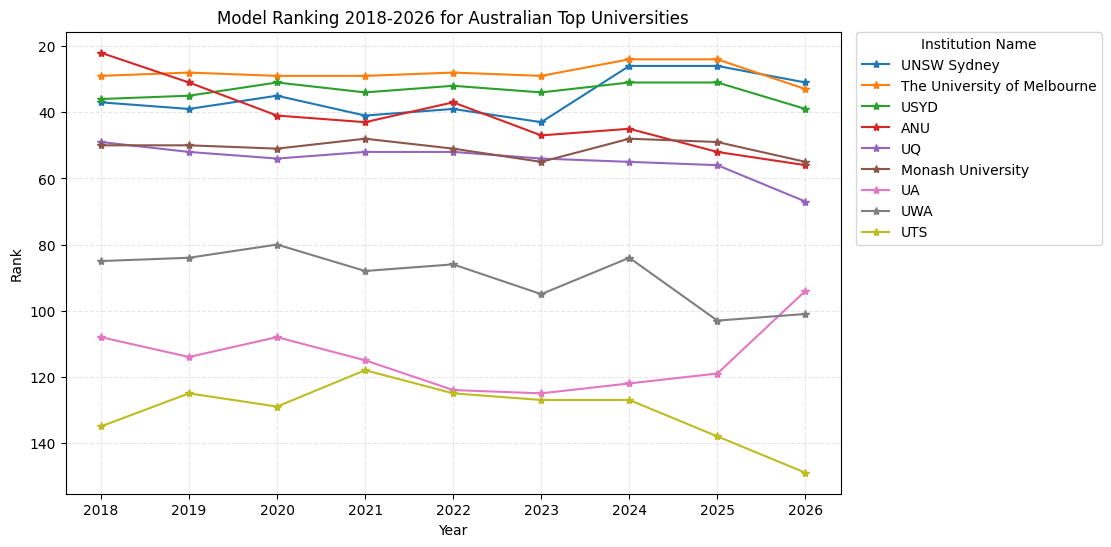

In [11]:
plt.figure(figsize=(10, 6))

# ranking trend graph
for university in rank_aus['Institution Name'].unique():
    sub_df = rank_aus[rank_aus['Institution Name'] == university]
    plt.plot(
        sub_df['Year'], 
        sub_df['Rank'],
        marker='*',
        linestyle='-',
        label=university 
    )

plt.title('Model Ranking 2018-2026 for Australian Top Universities')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.gca().invert_yaxis()  # inverse order of y axis
plt.legend(
    loc='upper left',  
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0,
    title='Institution Name'
)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(range(2018, 2027))
plt.show()

### QS Ranking trend

In [18]:
qs = pd.read_csv('datasets\imputed_data_QS.csv')

mask_2018_2020 = (qs['Year'] >= 2018) & (qs['Year'] <= 2020)
qs.loc[mask_2018_2020, 'Institution Name'] = qs.loc[mask_2018_2020, 'Institution Name'].apply(lambda x: x.upper())
# uniform university name
qs.loc[qs['Institution Name'].isin(['The University of New South Wales','THE UNIVERSITY OF NEW SOUTH WALES (UNSW)','The University of New South Wales (UNSW Sydney)']), 'Institution Name'] = 'UNSW Sydney'
qs.loc[qs['Institution Name'].isin(['The University of Sydney', 'THE UNIVERSITY OF SYDNEY']),'Institution Name'] = 'USYD'
qs.loc[qs['Institution Name'].isin(['Australian National University', 'AUSTRALIAN NATIONAL UNIVERSITY (ANU)','The Australian National University']), 'Institution Name'] = 'ANU'
qs.loc[qs['Institution Name'].isin(['The University of Queensland','THE UNIVERSITY OF QUEENSLAND (UQ)']), 'Institution Name'] = 'UQ'
qs.loc[qs['Institution Name'].isin(['The University of Western Australia','THE UNIVERSITY OF WESTERN AUSTRALIA (UWA)']), 'Institution Name'] = 'UWA'
qs.loc[qs['Institution Name'].isin(['University of Technology Sydney','UNIVERSITY OF TECHNOLOGY SYDNEY (UTS)']), 'Institution Name'] = 'UTS'
qs.loc[qs['Institution Name'].isin(['Adelaide University', 'THE UNIVERSITY OF ADELAIDE','The University of Adelaide']), 'Institution Name'] = 'UA'
qs.loc[qs['Institution Name'] == 'THE UNIVERSITY OF MELBOURNE','Institution Name'] = 'The University of Melbourne'
qs.loc[qs['Institution Name'] == 'MONASH UNIVERSITY','Institution Name'] = 'Monash University'
target = ['UNSW Sydney','The University of Melbourne','USYD','ANU','UQ','Monash University','UA','UWA','UTS']


In [21]:
# Count number of top 100 universities for each country
years = [2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025, 2026]

# Uniform the same country name
qs.loc[qs['Country'].isin(['Hong Kong SAR','Hong Kong','Hong Kong,China']), 'Country'] = 'Hong Kong SAR, China'
qs.loc[qs['Country']== 'China', 'Country'] = 'China (Mainland)'
qs.loc[qs['Country']== 'United States', 'Country'] = 'United States of America'
qs.loc[qs['Country']== 'South Korea', 'Country'] = 'Republic of Korea'

# create dictionaries to store annual data
yearly_top100 = {}
country_top100 = {}
for year in years:
    yearly_top100[year] = qs.loc[(qs['Rank'] <= 100) & (qs['Year'] == year)]
    country_top100[year]= (yearly_top100[year]
    .groupby(['Country'])
    .count()
    .rename(columns={'Institution Name': year})
    .sort_values(by='Year', ascending=False)
    .iloc[:,:1])

result = pd.concat([country_top100[2026],
                    country_top100[2025],
                    country_top100[2024],
                    country_top100[2023],
                    country_top100[2022],
                    country_top100[2021],
                    country_top100[2020],
                    country_top100[2019],
                    country_top100[2018]],axis=1)
result.head(10)

,Rank,Rank,Rank,Rank,Rank,Rank,Rank,Rank,Rank
Country,,,,,,,,,
United States of America,26.0,25.0,27.0,27.0,28.0,27.0,29.0,33.0,31.0
United Kingdom,17.0,15.0,17.0,17.0,17.0,18.0,18.0,18.0,16.0
Australia,9.0,9.0,9.0,7.0,7.0,7.0,7.0,7.0,7.0
China (Mainland),5.0,5.0,5.0,6.0,6.0,6.0,6.0,6.0,6.0
Germany,5.0,5.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0
"Hong Kong SAR, China",5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0
Canada,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0
France,4.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,2.0
Japan,4.0,4.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0


In [13]:
qs_aus = qs.loc[(qs['Country'] == 'Australia') & (qs['Year']>=2018) & qs['Institution Name'].isin(target)]
qs_aus = qs_aus.iloc[:,:4]
# Grouping and sort by school
qs_aus['Institution Name'] = pd.Categorical(
    qs_aus['Institution Name'],
    categories=target,
    ordered=True
)
qs_aus = qs_aus.sort_values(['Institution Name', 'Year'])

qs_aus.reset_index(drop=True, inplace=True)
qs_aus.head()

,Rank,Institution Name,Country,Year
0,45.0,UNSW Sydney,Australia,2018
1,45.0,UNSW Sydney,Australia,2019
2,43.0,UNSW Sydney,Australia,2020
3,44.0,UNSW Sydney,Australia,2021
4,43.0,UNSW Sydney,Australia,2022


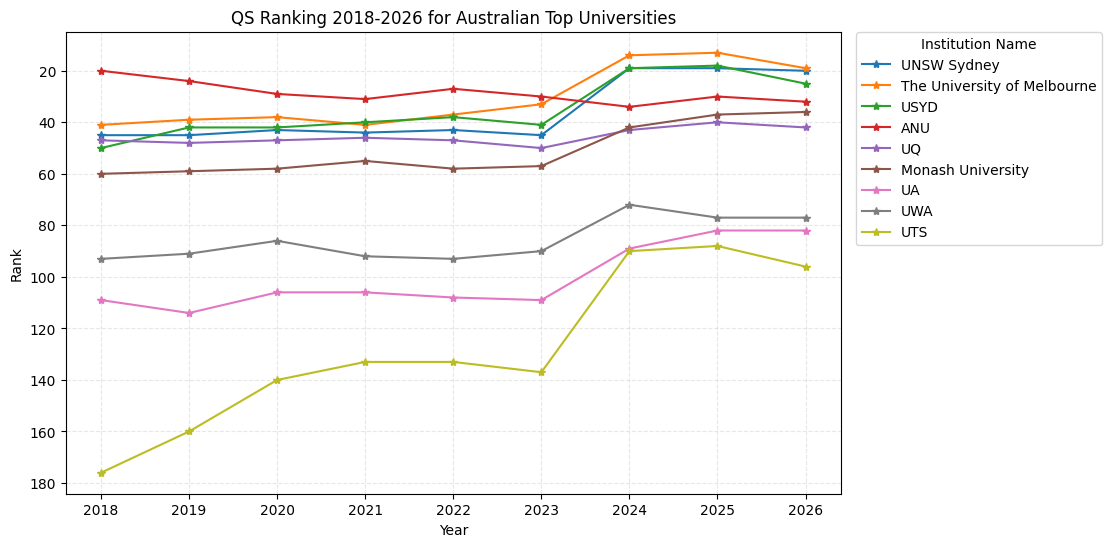

In [14]:
plt.figure(figsize=(10, 6))

# ranking trend graph
for university in qs_aus['Institution Name'].unique():
    sub_df = qs_aus[qs_aus['Institution Name'] == university]
    plt.plot(
        sub_df['Year'], 
        sub_df['Rank'],
        marker='*',
        linestyle='-',
        label=university 
    )

plt.title('QS Ranking 2018-2026 for Australian Top Universities')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.gca().invert_yaxis()  # inverse order of y axis
plt.legend(
    loc='upper left',  
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0,
    title='Institution Name'
)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(range(2018, 2027))
plt.show()

### THE Ranking trend

In [22]:
the = pd.read_csv('datasets\cleaned_data_THE.csv')
# uniform university name
the.loc[the['Name'] == 'The University of Sydney', 'Name'] = 'USYD'
the.loc[the['Name'] == 'Australian National University', 'Name'] = 'ANU'
the.loc[the['Name'] == 'The University of Queensland', 'Name'] = 'UQ'
the.loc[the['Name'] == 'The University of Western Australia', 'Name'] = 'UWA'
the.loc[the['Name'] == 'University of Technology Sydney', 'Name'] = 'UTS'
the.loc[the['Name'] == 'University of Adelaide', 'Name'] = 'UA'
target = ['UNSW Sydney','The University of Melbourne','USYD','ANU','UQ','Monash University','UA','UWA','UTS']

In [23]:
# Count number of top 100 universities for each country
years = [2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]

# create dictionaries to store annual data
yearly_top100 = {}
country_top100 = {}
for year in years:
    yearly_top100[year] = the.loc[(the['Rank'] <= 100) & (the['Year'] == year)]
    country_top100[year]= (yearly_top100[year]
    .groupby(['Country'])
    .count()
    .rename(columns={'Institution Name': year})
    .sort_values(by='Year', ascending=False)
    .iloc[:,:1])

result = pd.concat([country_top100[2025],
                    country_top100[2024],
                    country_top100[2023],
                    country_top100[2022],
                    country_top100[2021],
                    country_top100[2020],
                    country_top100[2019],
                    country_top100[2018]],axis=1)
result.head(10)

,Rank,Rank,Rank,Rank,Rank,Rank,Rank,Rank
Country,,,,,,,,
United States,37.0,36.0,34.0,38.0,37.0,40.0,41.0,42.0
United Kingdom,12.0,11.0,10.0,11.0,11.0,11.0,11.0,12.0
Germany,8.0,8.0,9.0,7.0,7.0,8.0,8.0,9.0
China,7.0,7.0,7.0,6.0,6.0,3.0,3.0,2.0
Australia,6.0,6.0,7.0,6.0,6.0,6.0,6.0,6.0
Hong Kong,5.0,5.0,5.0,4.0,3.0,3.0,3.0,3.0
Netherlands,5.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0
France,4.0,4.0,4.0,3.0,3.0,3.0,2.0,1.0
Canada,3.0,3.0,4.0,5.0,5.0,5.0,5.0,4.0


In [16]:
the_aus = the.loc[(the['Country'] == 'Australia') & (the['Year']>=2018) & the['Name'].isin(target)]
the_aus = the_aus.iloc[:,:4]
# Grouping and sort by school
the_aus['Name'] = pd.Categorical(
    the_aus['Name'],
    categories=target,
    ordered=True
)
the_aus = the_aus.sort_values(['Name', 'Year'])

the_aus.reset_index(drop=True, inplace=True)
the_aus

,Rank,Name,Country,Year
0,85,UNSW Sydney,Australia,2018
1,97,UNSW Sydney,Australia,2019
2,71,UNSW Sydney,Australia,2020
3,67,UNSW Sydney,Australia,2021
4,70,UNSW Sydney,Australia,2022
...,...,...,...,...
59,162,UTS,Australia,2021
60,143,UTS,Australia,2022
61,133,UTS,Australia,2023
62,148,UTS,Australia,2024


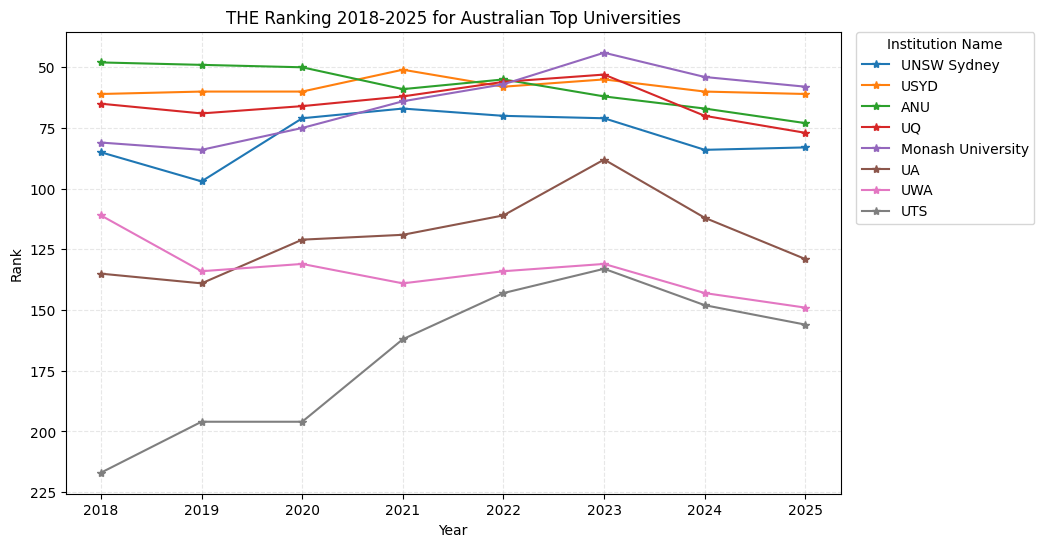

In [17]:
plt.figure(figsize=(10, 6))

# ranking trend graph
for university in the_aus['Name'].unique():
    sub_df = the_aus[the_aus['Name'] == university]
    plt.plot(
        sub_df['Year'], 
        sub_df['Rank'],
        marker='*',
        linestyle='-',
        label=university 
    )

plt.title('THE Ranking 2018-2025 for Australian Top Universities')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.gca().invert_yaxis()  # inverse order of y axis
plt.legend(
    loc='upper left',  
    bbox_to_anchor=(1.02, 1),
    borderaxespad=0,
    title='Institution Name'
)
plt.grid(True, linestyle='--', alpha=0.3)
plt.xticks(range(2018, 2026))
plt.show()

### Compare over different systems

In [18]:
model_rank.loc[model_rank['Institution Name'].isin(['The University of New South Wales','THE UNIVERSITY OF NEW SOUTH WALES (UNSW)','The University of New South Wales (UNSW Sydney)']), 'Institution Name'] = 'UNSW Sydney'
target_school = 'UNSW Sydney'
target_rank_model = model_rank.loc[model_rank['Institution Name'] == target_school]
target_rank_model = target_rank_model.loc[:,['Year','Institution Name','Rank']]
target_rank_model['System'] = 'Our Model'

target_rank_qs = qs.loc[qs['Institution Name'] == target_school]
target_rank_qs = target_rank_qs.loc[:,['Year','Institution Name','Rank']]
target_rank_qs['System'] = 'QS'

target_rank_the = the.loc[the['Name'] == target_school]
target_rank_the = target_rank_the.rename(columns={'Name':'Institution Name'})
target_rank_the = target_rank_the.loc[:,['Year','Institution Name','Rank']]
target_rank_the['System'] = 'THE'

target_rank = pd.concat([target_rank_model,target_rank_qs,target_rank_the])
target_rank.reset_index(drop=True, inplace=True)
target_rank = target_rank.loc[(target_rank['Year'] >= 2018) & (target_rank['Year'] <= 2026)]
target_rank

,Year,Institution Name,Rank,System
0,2018,UNSW Sydney,37.0,Our Model
1,2019,UNSW Sydney,39.0,Our Model
2,2020,UNSW Sydney,35.0,Our Model
3,2021,UNSW Sydney,41.0,Our Model
4,2022,UNSW Sydney,39.0,Our Model
5,2023,UNSW Sydney,43.0,Our Model
6,2024,UNSW Sydney,26.0,Our Model
7,2025,UNSW Sydney,26.0,Our Model
8,2026,UNSW Sydney,31.0,Our Model
9,2018,UNSW Sydney,45.0,QS


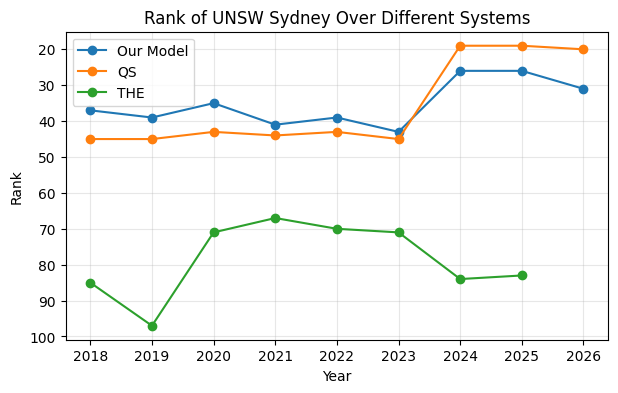

In [19]:
systems = target_rank['System'].unique()

plt.figure(figsize=(7, 4))
for system in systems:
    sub = target_rank[target_rank['System'] == system]
    plt.plot(
        sub['Year'], 
        sub['Rank'],
        marker='o',
        linestyle='-',
        label=system 
    )


plt.title(f'Rank of {target_school} Over Different Systems')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.gca().invert_yaxis()
plt.legend()
plt.grid(True, alpha=0.3) 
plt.xticks(sorted(target_rank['Year'].unique()))

plt.show()